## Writing the Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Reading in the data

In [3]:
all_ratios = pd.read_csv('all_ratios.csv')
all_ratios = all_ratios.drop(columns=['Unnamed: 0'])
all_ratios.head()

,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio
0,2018-10-13,Rodney Leland Blum,ENB,2018-09-18,100001.0,50000.0,2.000020
1,2019-01-08,Rodney Leland Blum,MO,2018-12-17,100001.0,50000.0,2.000020
2,2023-06-06,Jonathan Jackson,HON,2023-05-01,50001.0,35000.0,1.428600
3,2018-12-17,Paul Mitchell Iii,SU,2018-12-17,100001.0,85000.0,1.176482
4,2018-12-12,Paul Mitchell Iii,SJM,2018-12-12,100001.0,85000.0,1.176482


#### The permutation function takes in the congress dataframe and returns a new dataframe with random purchases assigned to congressmen.

In [4]:
def permutation(df):
    permi=df.copy()
    df2=df.drop(['Representative', 'Rank'],axis=1)
    columns=['ReportDate','TransactionDate','Ticker','Amount','Delta','Ratio']
    permi[columns]=pd.DataFrame(np.random.permutation(df2))
    return permi

#### Permutations for the amount/delta ratio rank

#### feedback
trimmed mean? cut off top percentile and bottom percentile

In [5]:
all_ratios['Rank'] = all_ratios['Ratio'].rank(ascending=False)

# permute the data, so that the rank and ratio is random for each row 
all_ratios_new = permutation(all_ratios)
all_ratios_new['Rank'] = all_ratios_new['Ratio'].rank(ascending=False)

# show difference  
all_ratios.head()


,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio,Rank
0,2018-10-13,Rodney Leland Blum,ENB,2018-09-18,100001.0,50000.0,2.000020,1.5
1,2019-01-08,Rodney Leland Blum,MO,2018-12-17,100001.0,50000.0,2.000020,1.5
2,2023-06-06,Jonathan Jackson,HON,2023-05-01,50001.0,35000.0,1.428600,3.0
3,2018-12-17,Paul Mitchell Iii,SU,2018-12-17,100001.0,85000.0,1.176482,4.5
4,2018-12-12,Paul Mitchell Iii,SJM,2018-12-12,100001.0,85000.0,1.176482,4.5


In [6]:
all_ratios_new.sort_values(by=['Ratio'], ascending=False).head()

,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio,Rank
19348,2018-10-13,Daniel Goldman,2018-09-18,ENB,100001.0,50000.0,2.00002,1.5
3195,2019-01-08,Marie Newman,2018-12-17,MO,100001.0,50000.0,2.00002,1.5
1617,2023-06-06,Tom Malinowski,2023-05-01,HON,50001.0,35000.0,1.4286,3.0
14673,2018-12-12,Shelley Moore Capito,2018-12-12,SJM,100001.0,85000.0,1.176482,4.5
12645,2018-12-17,Thomas R. Carper,2018-12-17,SU,100001.0,85000.0,1.176482,4.5


# Step 2: Permute the representatives 1000 times
- run the permutation function on all_ratios df. **I know I used all_ratios_new but shouldn't matter for the purposes of this permutation**
- create a new rank based on the permuted data
- for each row, add the representative and their rank to a dictionary, if representative is already in the dictionary add the other rank to the dictionary's value list to create a list of ranks

In [7]:
representative_average_rank = {}
def representative_rank(df):
    #  create a random permutation of the data and store representative as the key, and the rank as the value
    for i in range(1000):
        all_ratios_new = permutation(df)
        all_ratios_new['Rank'] = all_ratios_new['Ratio'].rank(ascending=False)
        for index, row in all_ratios_new.iterrows():
            if row['Representative'] in representative_average_rank:
                representative_average_rank[row['Representative']].append(row['Rank'])
            else:
                representative_average_rank[row['Representative']] = [row['Rank']]

# take the average of the rank for each representative
representative_rank(all_ratios)

In [8]:
# count number of keys
num_keys = len(representative_average_rank.keys())
#  for each value, find the len of the list and add to  sum
num_ranks = 0
for key, value in representative_average_rank.items():
    num_ranks += len(value)
print(f'Number of keys: {num_keys}')
print(f'Number of ranks: {num_ranks}')

Number of keys: 150
Number of ranks: 23519000


# Step 3: Find difference of average permuted rank to actual rank

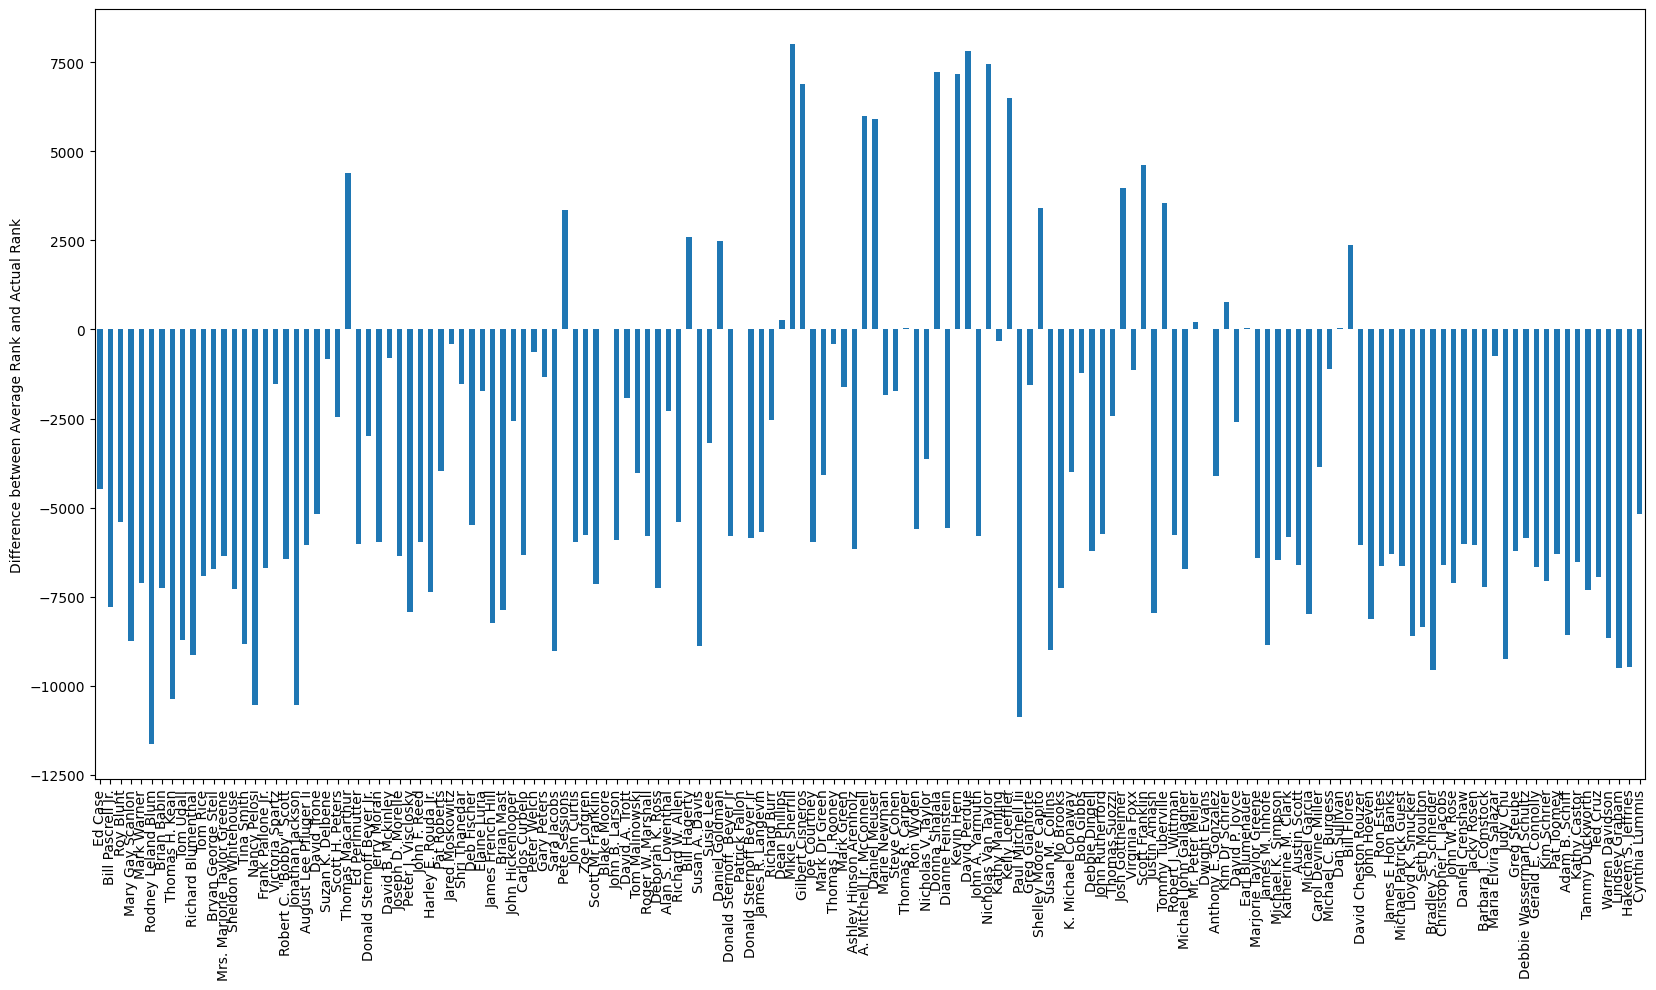

In [9]:
# for each of the representatives, take the average of the rank, and compare to their actual rank from all_ratios
representative_average_ranks = {k: np.mean(v) for k, v in representative_average_rank.items()}
representative_average_ranks = pd.DataFrame.from_dict(representative_average_ranks, orient='index', columns=['Average Rank'])
representative_average_ranks = representative_average_ranks.sort_values(by=['Average Rank'], ascending=False)

representative_average_ranks['Actual Rank'] = all_ratios.groupby('Representative')['Rank'].mean()

representative_average_ranks['Difference'] = representative_average_ranks['Actual Rank'] - representative_average_ranks['Average Rank']

# plot the difference between the average rank and the actual rank
representative_average_ranks['Difference'].plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Average Rank and Actual Rank')
plt.show()


In [10]:
# give only positive differences 
representative_rank_difference = representative_average_ranks[representative_average_ranks['Difference'] > 0]

# Step 4: Isolate the Positive Differences

In [11]:
representative_rank_difference

,Average Rank,Actual Rank,Difference
Thomas Macarthur,11786.858102,16179.028024,4392.169922
Pete Sessions,11773.575004,15131.991150,3358.416146
Blake Moore,11772.116440,11777.448276,5.331836
Bill Hagerty,11768.606762,14358.714286,2590.107524
Daniel Goldman,11766.628555,14254.871886,2488.243331
Patrick Fallon,11765.943212,11775.947619,10.004407
Dean Phillips,11765.381839,12024.190476,258.808638
Mikie Sherrill,11764.735876,19772.328185,8007.592309
Gilbert Cisneros,11764.103148,18647.421348,6883.318200
A. Mitchell Jr. McConnell,11759.778405,17737.976190,5978.197786


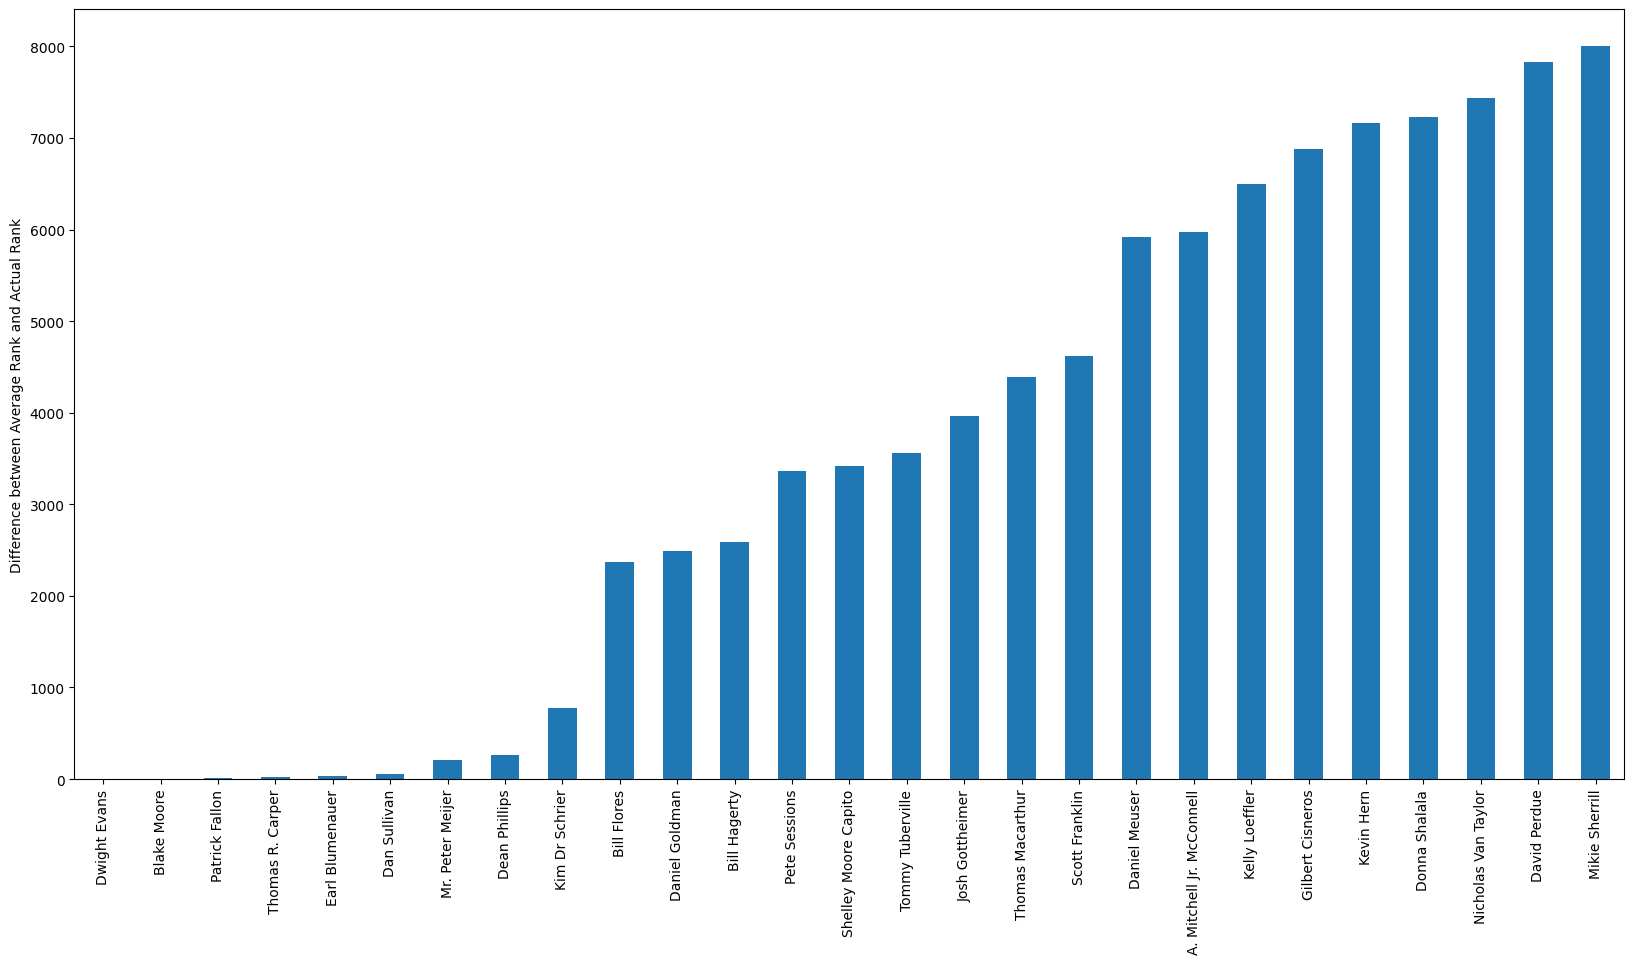

In [12]:
#plot highest differences
representative_rank_difference['Difference'].sort_values().plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Average Rank and Actual Rank')
plt.show()


# Step 5: Find distribution of actual rank

In [13]:
# create  a distirbution of the  the rank for each representative
# create a distribution of the rank for each representative
actual_rank = {}
for index, row in all_ratios.iterrows():
    if row['Representative'] in actual_rank:
        actual_rank[row['Representative']].append(row['Rank'])
    else:
        actual_rank[row['Representative']] = [row['Rank']]


In [14]:
# find std and mean of the distribution for each
representative_std = {}
representative_mean = {}
for key, value in actual_rank.items():
    representative_std[key] = np.std(value)
    representative_mean[key] = np.mean(value)

representative_std = pd.DataFrame.from_dict(representative_std, orient='index', columns=['Std'])
representative_mean = pd.DataFrame.from_dict(representative_mean, orient='index', columns=['Mean'])

# create a dataframe with the std and mean for each representative
new_df = pd.concat([representative_std, representative_mean], axis=1)
new_df


,Std,Mean
Rodney Leland Blum,327.861844,233.333333
Jonathan Jackson,267.659595,1258.434783
Paul Mitchell Iii,1248.043469,887.000000
Mo Brooks,2619.857660,4494.857143
Susan M. Collins,2935.921769,2760.768293
...,...,...
Bill Hagerty,7320.918288,14358.714286
Scott Franklin,7240.223556,16371.441176
Suzan K. Delbene,9922.528943,10962.333333
Kelly Loeffler,5019.216613,18254.892442


In [15]:
representative_z_score = {}

for key, value in actual_rank.items():
    representative_z_score[key] = [(i-new_df.loc[key]['Mean'])/new_df.loc[key]['Std'] for i in value]


In [16]:
# find highest 10% of  z scores
representative_z_score_top = {}
for key, value in representative_z_score.items():
    representative_z_score_top[key] = [i for i in value if i > 1.28]

# if the value is not an empty array, keep, if not drop
representative_z_score_top = {k: v for k, v in representative_z_score_top.items() if v != []}



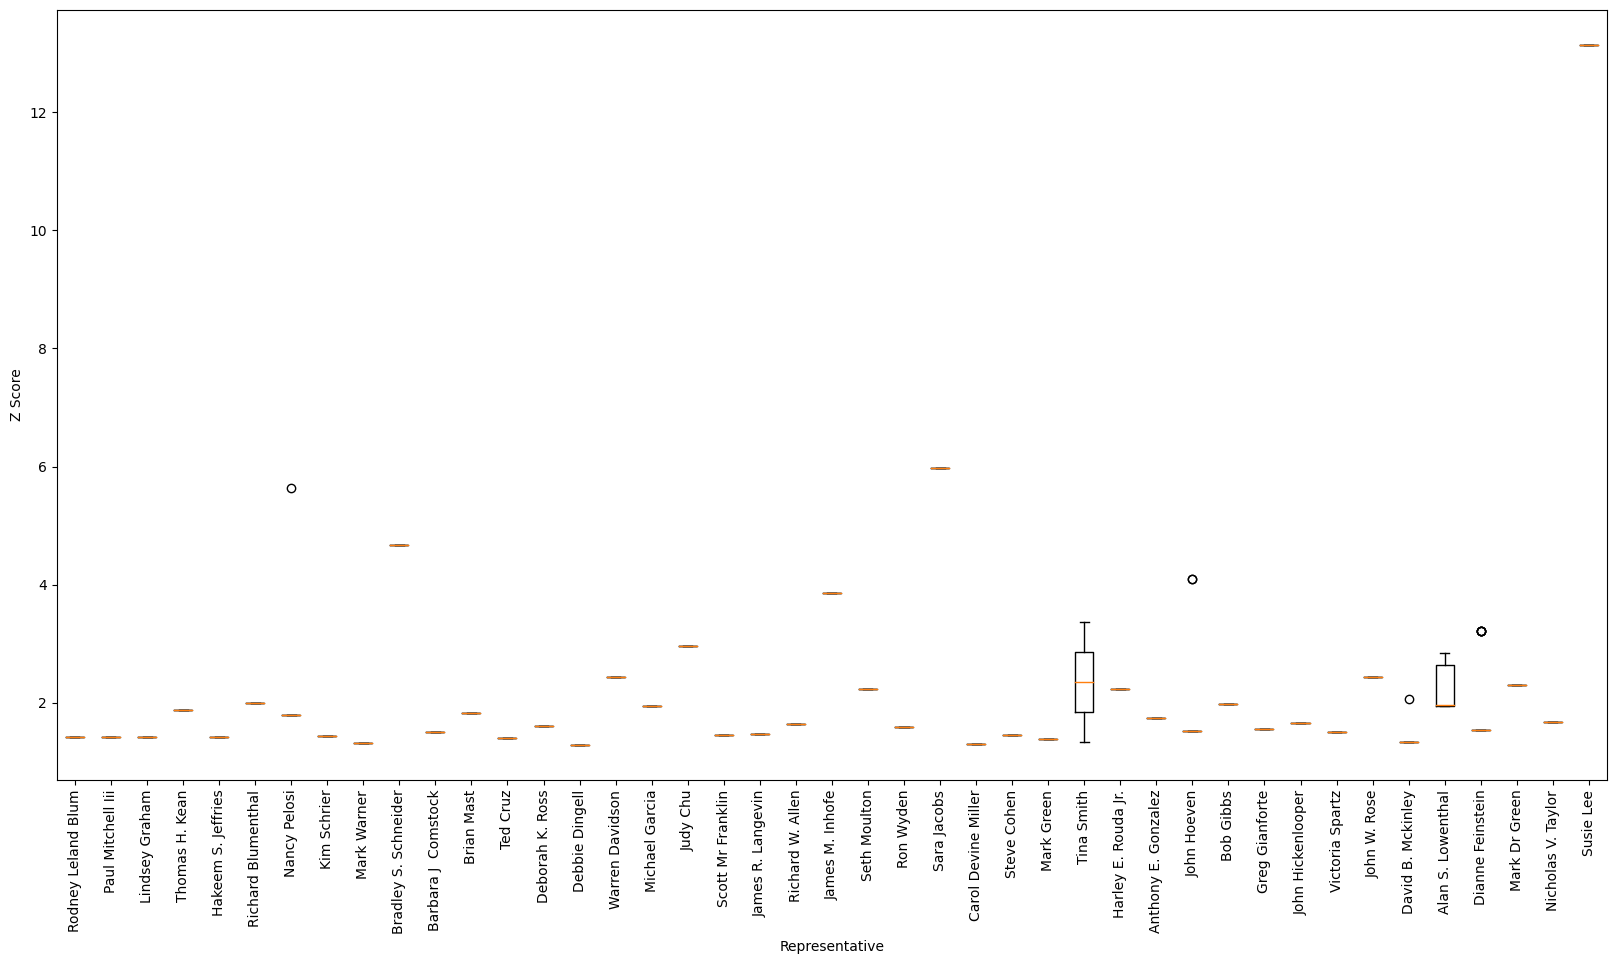

In [17]:

# plot these values
plt.figure(figsize=(20,10))
plt.boxplot(representative_z_score_top.values())
plt.xticks(range(1, len(representative_z_score_top.keys()) + 1), representative_z_score_top.keys())
plt.xlabel('Representative')
#tilt labels 90 degrees
plt.xticks(rotation=90)
plt.ylabel('Z Score')
plt.show()

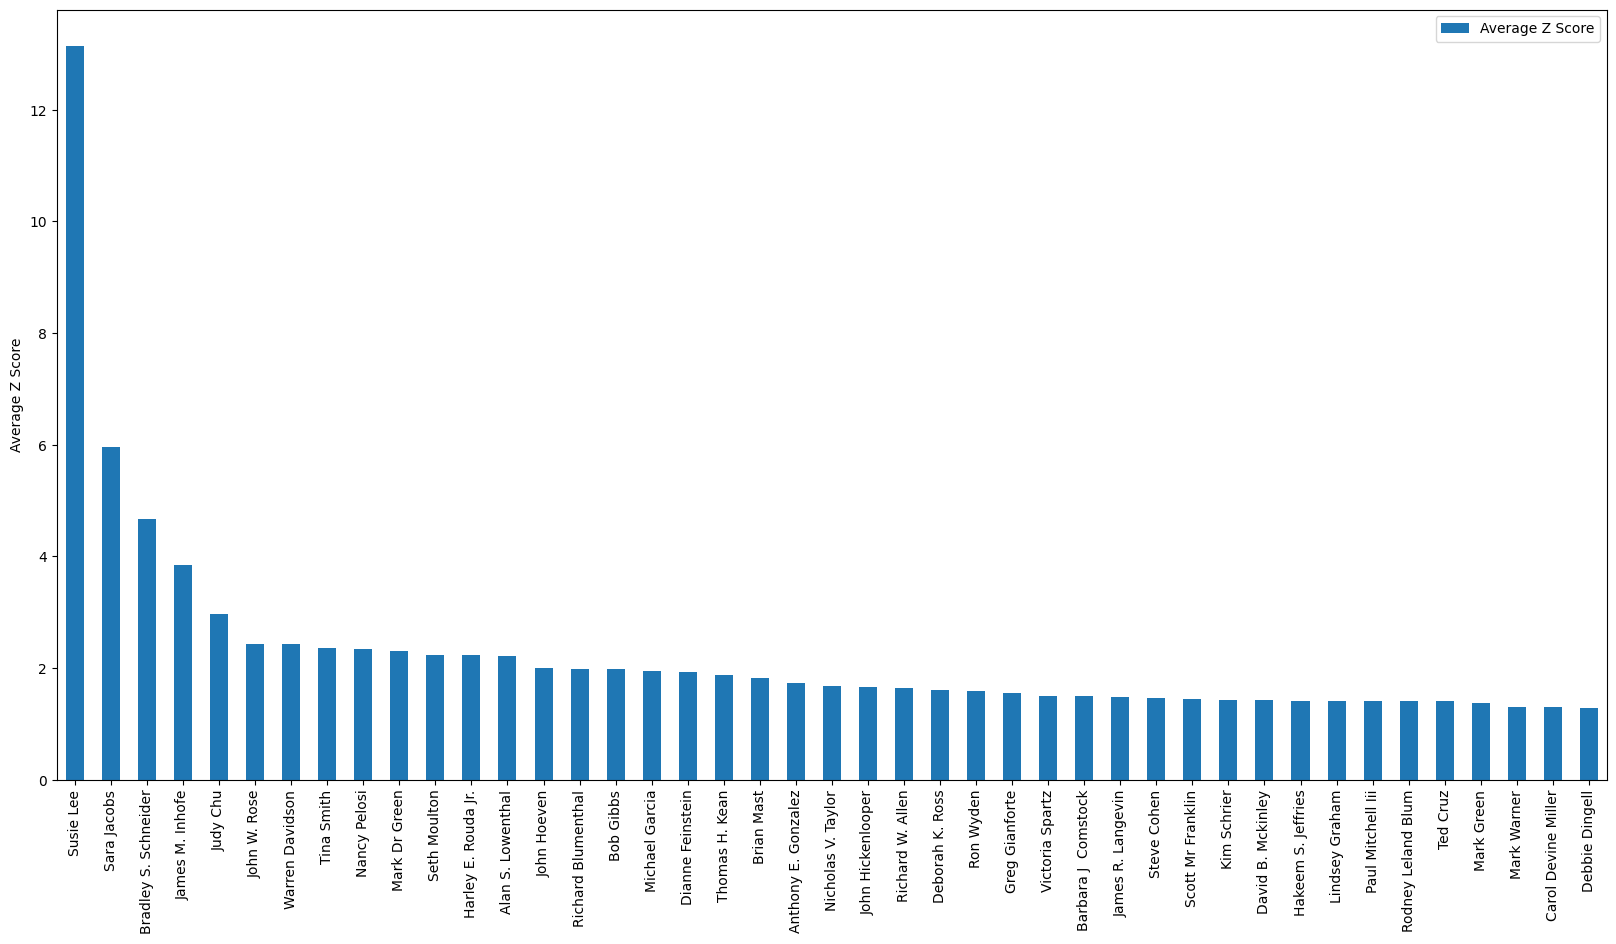

In [18]:
# find the average z score for each representative
representative_average_z_score = {k: np.mean(v) for k, v in representative_z_score_top.items()}
representative_average_z_score = pd.DataFrame.from_dict(representative_average_z_score, orient='index', columns=['Average Z Score'])
representative_average_z_score = representative_average_z_score.sort_values(by=['Average Z Score'], ascending=False)
representative_average_z_score

# plot the average z score for each representative
representative_average_z_score.plot(kind='bar', figsize=(20,10))
plt.ylabel('Average Z Score')
plt.show()


# Step 6: Find distrubtion of permuted ranks for each representative

In [19]:
permuted_representative_std = {}
permuted_representative_mean = {}
for key, value in representative_average_rank.items():
    permuted_representative_std[key] = np.std(value, axis=0)
    permuted_representative_mean[key] = np.mean(value, axis=0)



In [20]:
permuted_representative_std = pd.DataFrame.from_dict(permuted_representative_std, orient='index', columns=['Std'])


In [21]:
permuted_representative_mean = pd.DataFrame.from_dict(permuted_representative_mean, orient='index', columns=['Mean'])

In [22]:
# create a dataframe with the std and mean for each representative
permuted_dist = pd.concat([permuted_representative_std, permuted_representative_mean], axis=1)
permuted_dist

,Std,Mean
Rodney Leland Blum,6834.631864,11873.541167
Jonathan Jackson,6730.356066,11795.661196
Paul Mitchell Iii,6735.648373,11756.215000
Mo Brooks,6757.586758,11755.417759
Susan M. Collins,6769.488463,11755.502463
...,...,...
Bill Hagerty,6754.814422,11768.606762
Scott Franklin,6792.428587,11751.276471
Suzan K. Delbene,6741.148853,11789.204197
Kelly Loeffler,6753.059170,11756.557503


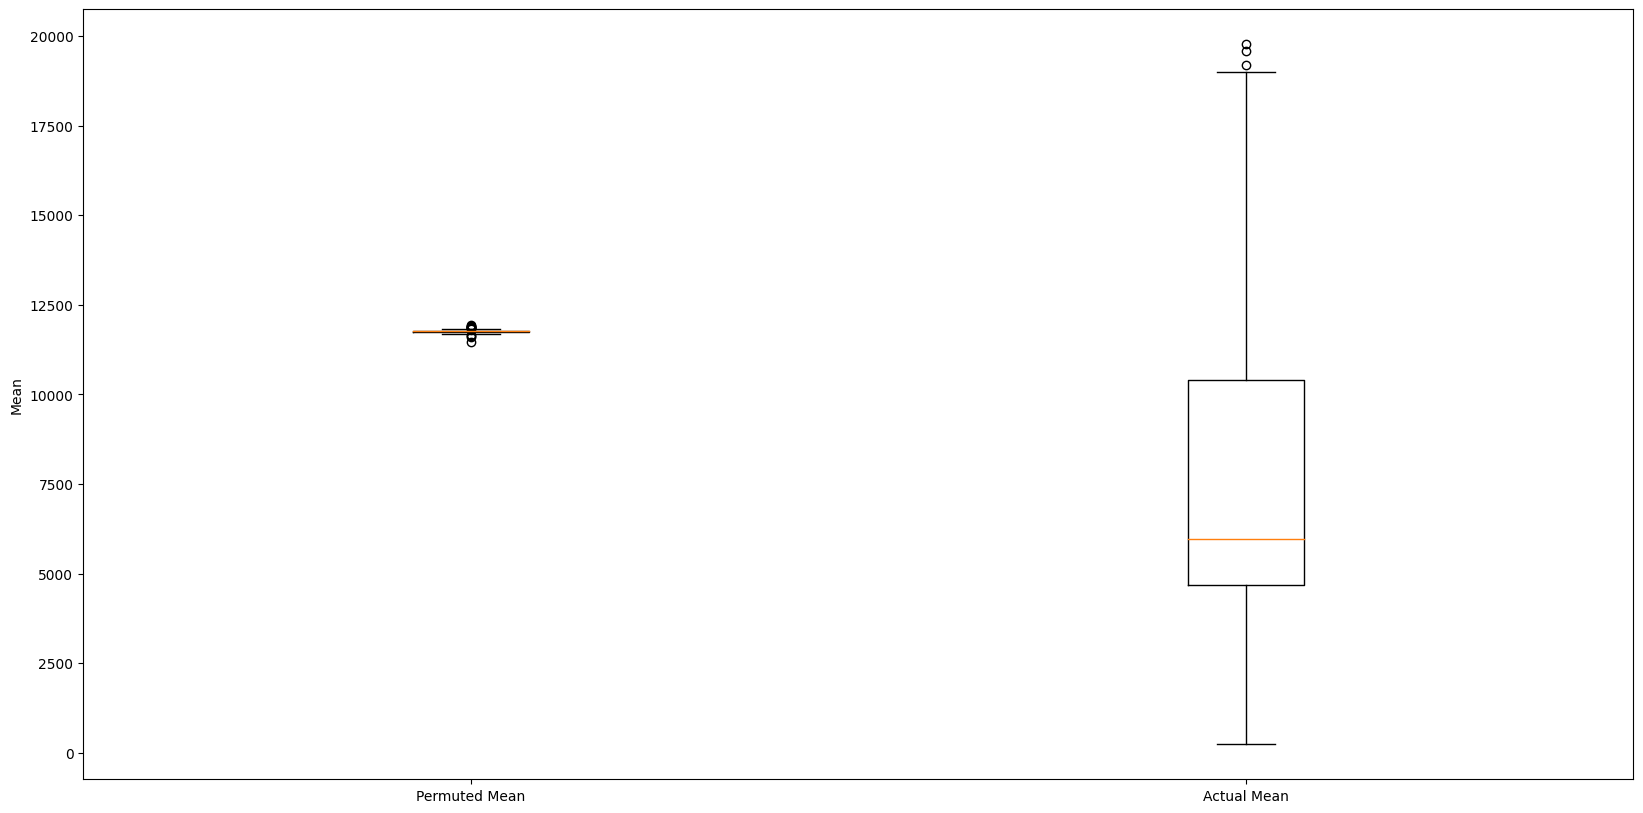

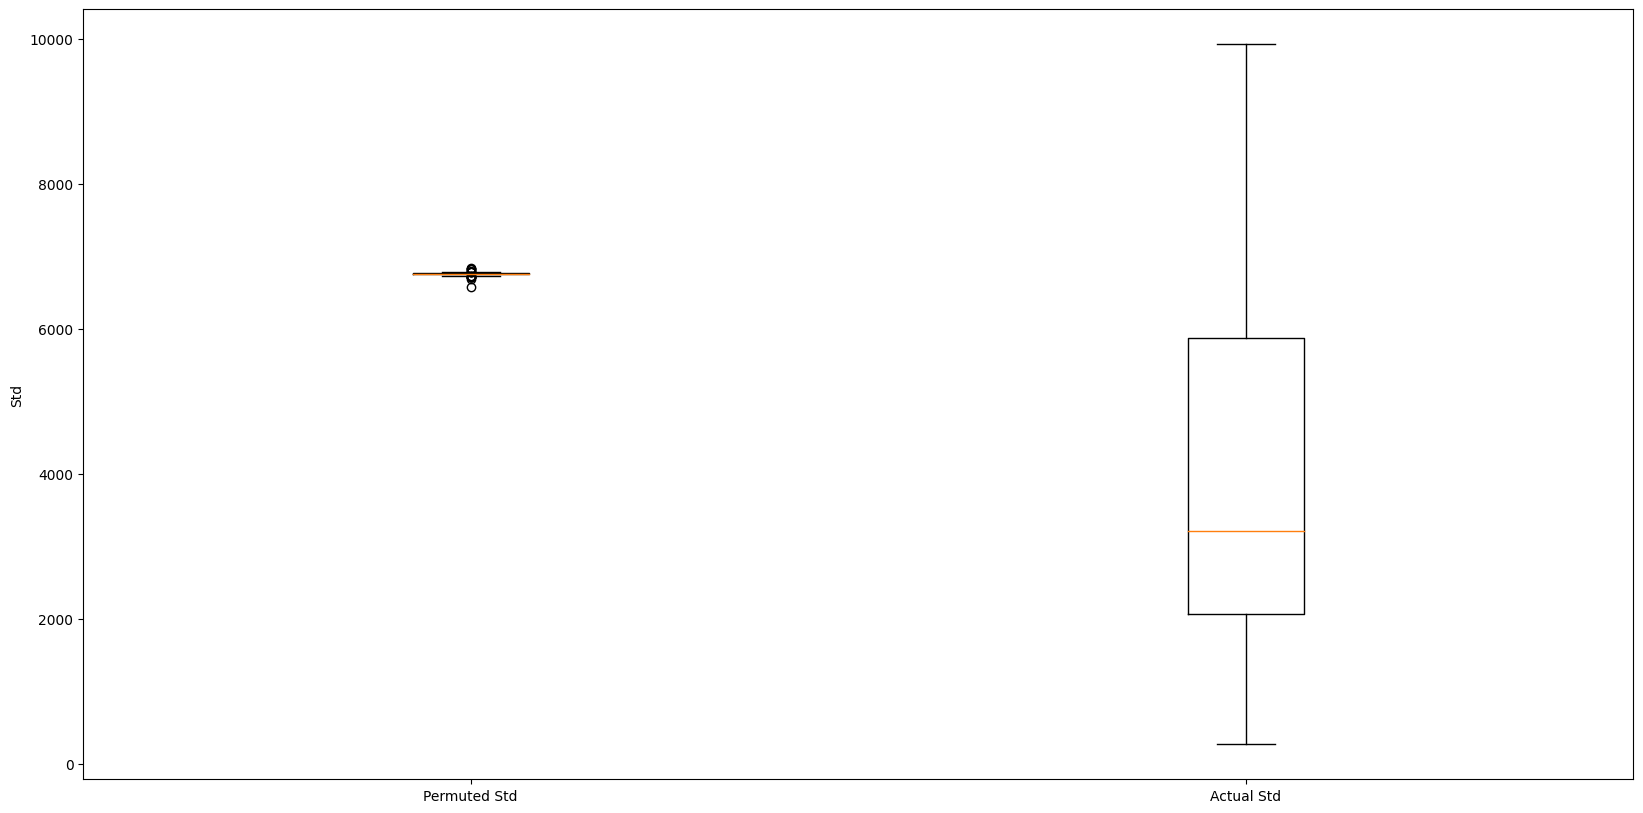

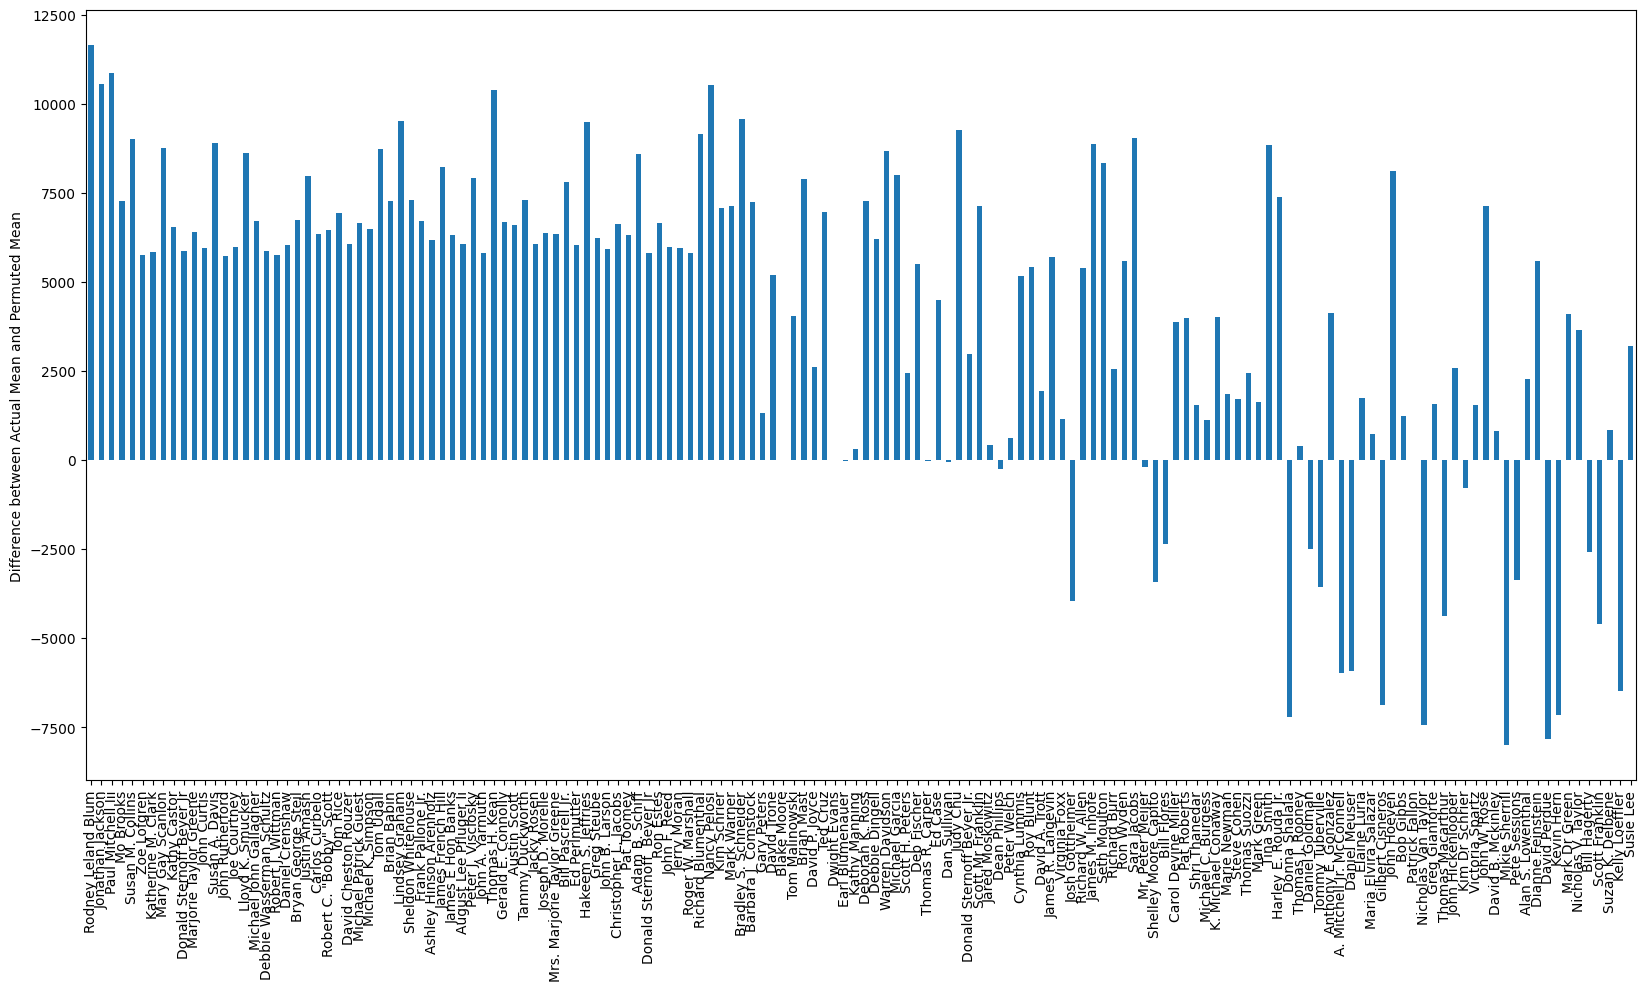

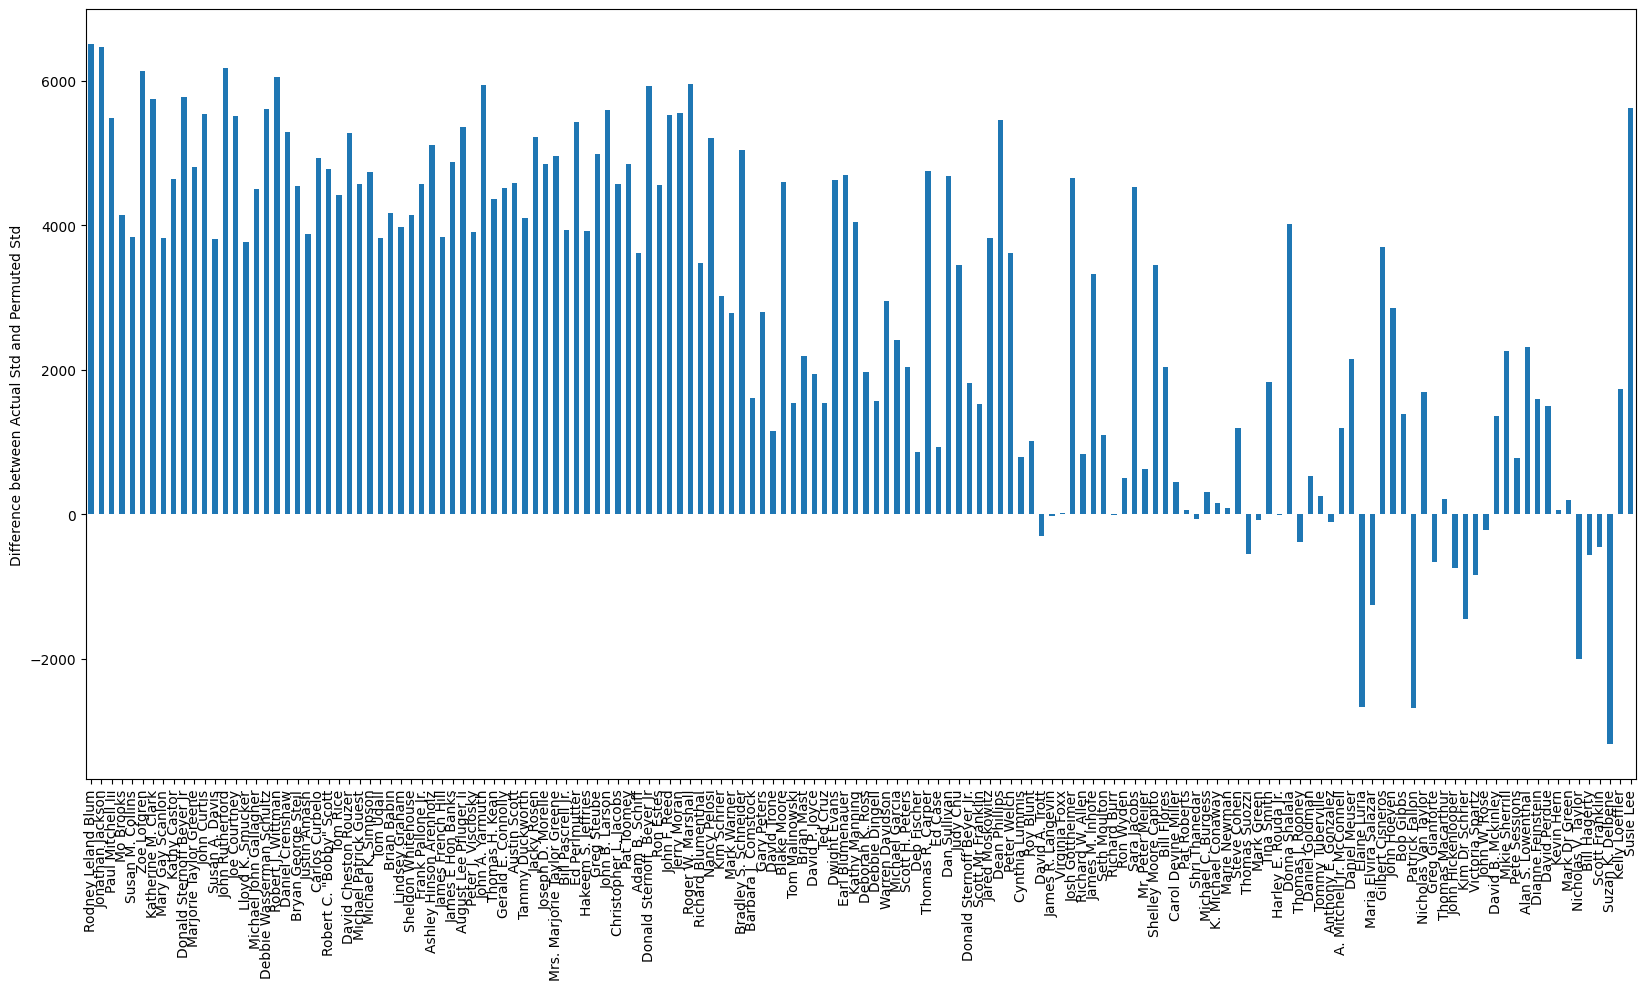

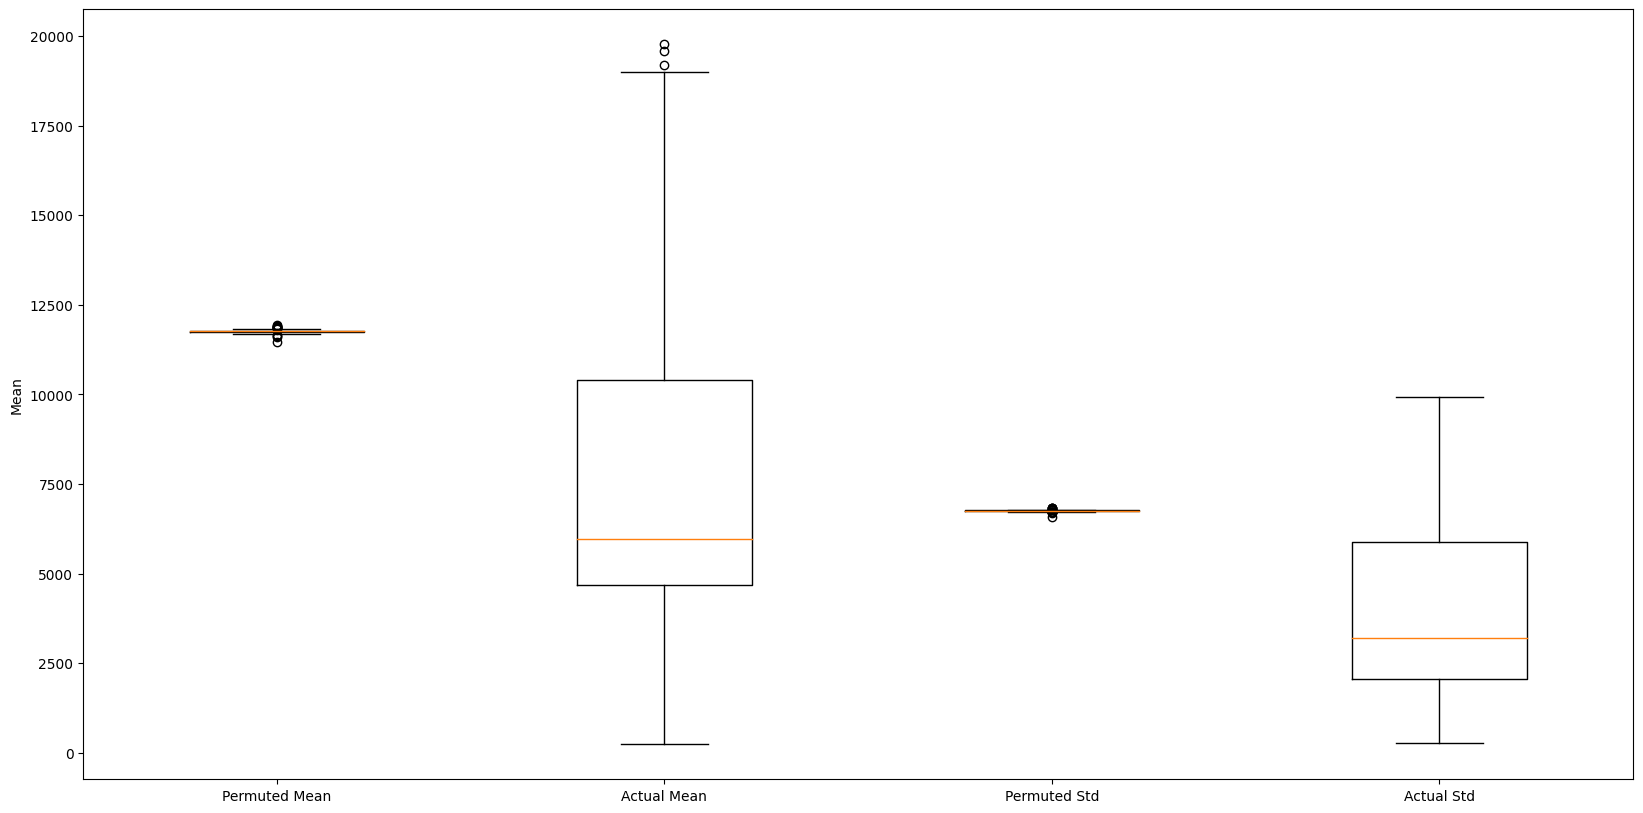

In [23]:
# compare the actual distribution to the permuted distribution
plt.figure(figsize=(20,10))
plt.boxplot([permuted_dist['Mean'], new_df['Mean']])
plt.xticks([1,2], ['Permuted Mean', 'Actual Mean'])
plt.ylabel('Mean')
plt.show()

plt.figure(figsize=(20,10))
plt.boxplot([permuted_dist['Std'], new_df['Std']])
plt.xticks([1,2], ['Permuted Std', 'Actual Std'])
plt.ylabel('Std')
plt.show()

# find the difference between the actual mean and the permuted mean
permuted_dist['Difference'] = permuted_dist['Mean'] - new_df['Mean']
permuted_dist['Difference'].plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Actual Mean and Permuted Mean')
plt.show()

# find the difference between the actual std and the permuted std
permuted_dist['Difference'] = permuted_dist['Std'] - new_df['Std']
permuted_dist['Difference'].plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Actual Std and Permuted Std')
plt.show()

# concatenate all these plots
plt.figure(figsize=(20,10))
plt.boxplot([permuted_dist['Mean'], new_df['Mean'], permuted_dist['Std'], new_df['Std']])
plt.xticks([1,2,3,4], ['Permuted Mean', 'Actual Mean', 'Permuted Std', 'Actual Std'])
plt.ylabel('Mean')
plt.show()


In [24]:
# left join the permuted distribution with the actual distribution
comparison_df = permuted_dist.join(new_df, how='left', lsuffix='_permuted', rsuffix='_actual').drop(columns=['Difference'])
comparison_df


,Std_permuted,Mean_permuted,Std_actual,Mean_actual
Rodney Leland Blum,6834.631864,11873.541167,327.861844,233.333333
Jonathan Jackson,6730.356066,11795.661196,267.659595,1258.434783
Paul Mitchell Iii,6735.648373,11756.215000,1248.043469,887.000000
Mo Brooks,6757.586758,11755.417759,2619.857660,4494.857143
Susan M. Collins,6769.488463,11755.502463,2935.921769,2760.768293
...,...,...,...,...
Bill Hagerty,6754.814422,11768.606762,7320.918288,14358.714286
Scott Franklin,6792.428587,11751.276471,7240.223556,16371.441176
Suzan K. Delbene,6741.148853,11789.204197,9922.528943,10962.333333
Kelly Loeffler,6753.059170,11756.557503,5019.216613,18254.892442


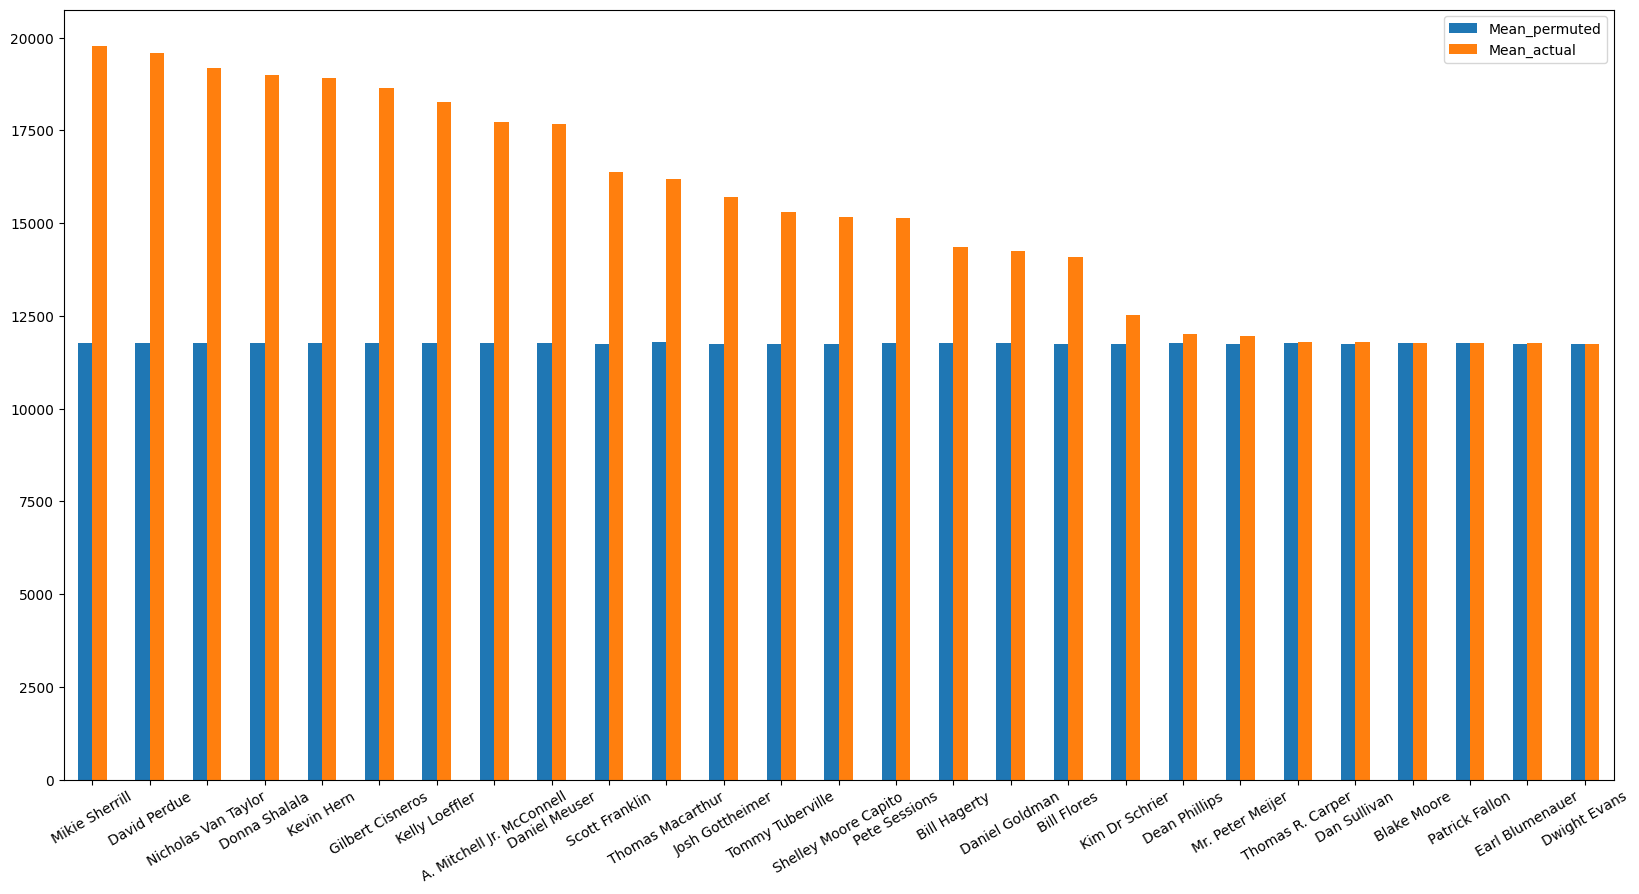

In [25]:
# make paired bar chart of actual mean and permuted mean where actual mean is greater than permuted mean
comparison_df[comparison_df['Mean_actual'] > comparison_df['Mean_permuted']][['Mean_permuted', 'Mean_actual']].sort_values('Mean_actual', ascending=False).plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=30)
plt.show()


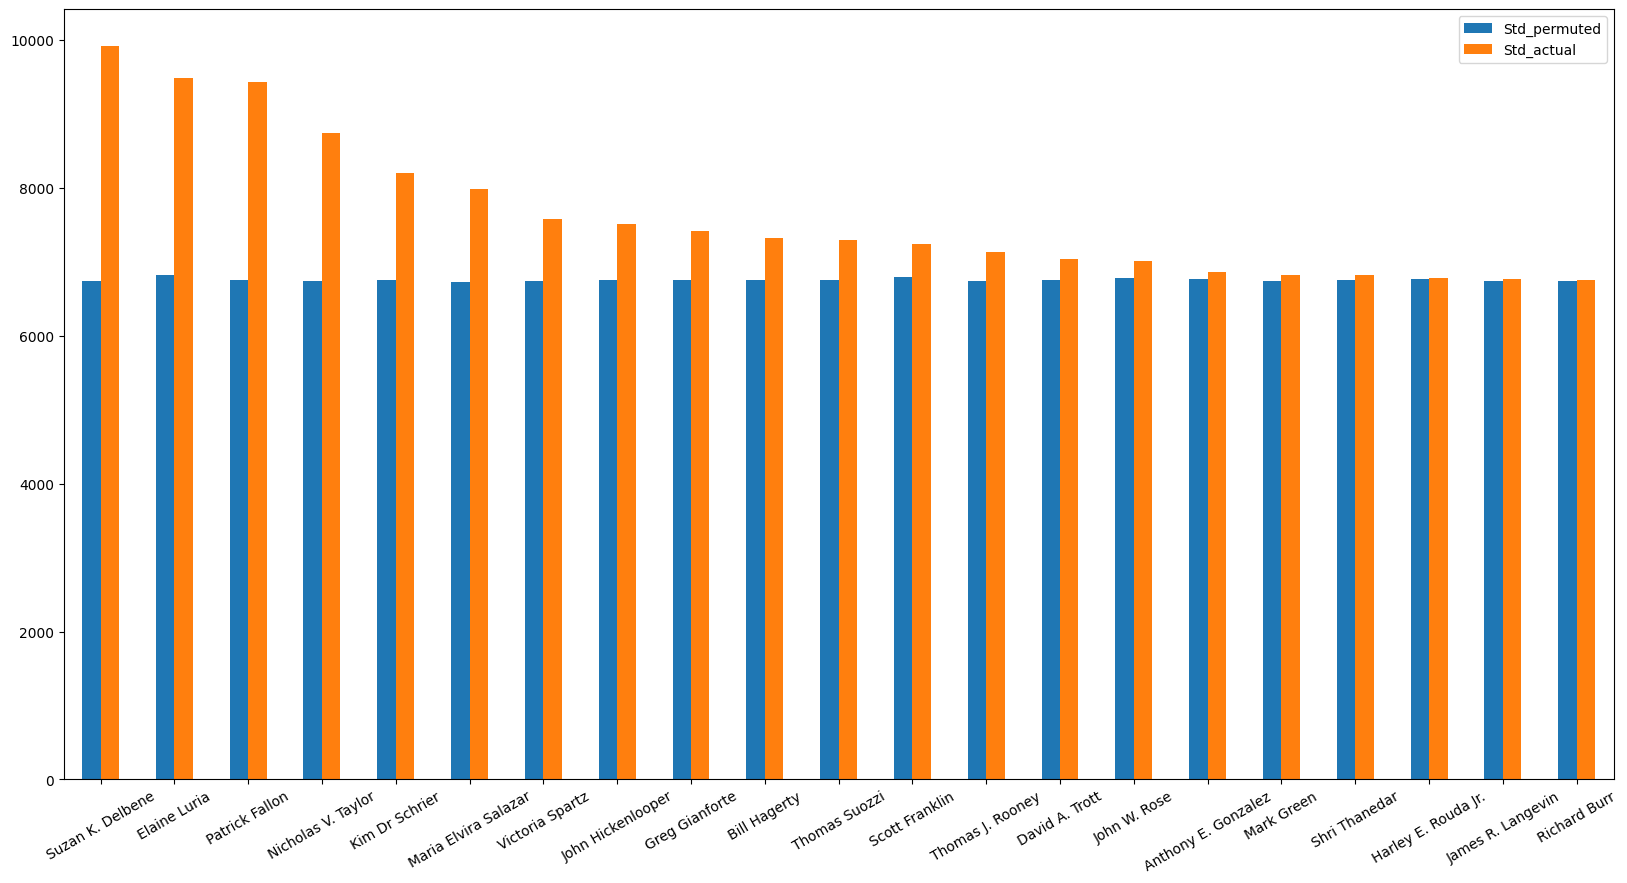

In [26]:
# make paired bar chart of actual mean and permuted mean where actual mean is greater than permuted mean
comparison_df[comparison_df['Std_actual'] > comparison_df['Std_permuted']][['Std_permuted', 'Std_actual']].sort_values('Std_actual', ascending=False).plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=30)
plt.show()


In [28]:
# for each representative_average_rank, find if its greater than the average_actual_rank, if larger than actual, add 1 to sum and get a total score
representative_total_score = {}
for key, value in representative_average_rank.items():
    representative_total_score[key] = np.sum([1 if i > representative_average_ranks.loc[key]['Actual Rank'] else 0 for i in value])




KeyboardInterrupt: 

In [ ]:
# to df
representative_total_score = pd.DataFrame.from_dict(representative_total_score, orient='index', columns=['Total Score'])
representative_total_score = representative_total_score.sort_values(by=['Total Score'], ascending=False)
representative_total_score